# Setup

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

print(os.getenv('HF_ENDPOINT'))
print(os.getenv('HF_HOME'))

from functools import partial
import time
import json

import numpy as np
import copy

import matplotlib.pyplot as plt
from collections import Counter

import torch
import datasets as dss

DS_BASE = os.path.normpath(os.path.join(os.getcwd(),"..","tmpds"))
print(DS_BASE)

from openai import AzureOpenAI
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForCausalLM
from vllm import LLM, SamplingParams
from typing import List, Dict, Tuple, Optional, Iterator

None
~/cloudfiles/code/Cache/HF
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ctrlidia100a4/code/SRC/O1/reasoningimprove/domain/Med/data/tmpds


2025-05-20 06:46:54.247621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747723614.261485   98803 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747723614.266049   98803 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747723614.278624   98803 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747723614.278644   98803 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747723614.278646   98803 computation_placer.cc:177] computation placer alr

In [2]:
qwnR1B7Tknz = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-7B")
def qwnTknLen(row, cotCol='qwnRsp', rspCol='rspCol'):
    tknlen1 = len(qwnR1B7Tknz.tokenize(row[cotCol]))
    tknlen2 = len(qwnR1B7Tknz.tokenize(row[rspCol]))
    assert tknlen1 > 0 and tknlen2 > 0
    row["qwnTknLen"] = tknlen1 + tknlen2
    return row

下面是画柱状图的函数：

In [3]:
def drawHist(lsForCnt, binSz=1000):
    upper = int((max(lsForCnt) + binSz)/binSz) * binSz
    bins = list(range(0, upper, binSz))

    plt.figure(figsize=(30, 6))
    plt.hist(lsForCnt, bins=bins, edgecolor='black')
    plt.xlabel("1hkGap")
    plt.ylabel("count")
    plt.title("countOf1hkGap")
    plt.xticks(bins) # 设置x轴刻度为每个桶的边界
    plt.show()

# RL DATA

## FreedomIntelligence/medical-o1-verifiable-problem

In [2]:
verfQDs = dss.load_dataset("FreedomIntelligence/medical-o1-verifiable-problem", cache_dir=DS_BASE)
verfQDs

DatasetDict({
    train: Dataset({
        features: ['Open-ended Verifiable Question', 'Ground-True Answer'],
        num_rows: 40644
    })
})

In [ ]:
r1dstlds = r1dstlds.map(partial(qwnTknLen, cotCol='reasoning (reasoning_content)', rspCol='response (content)'))
r1dstlds = r1dstlds['train']
r1dstlds

Map:   0%|          | 0/22000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'reasoning (reasoning_content)', 'response (content)', 'qwnTknLen'],
        num_rows: 22000
    })
})


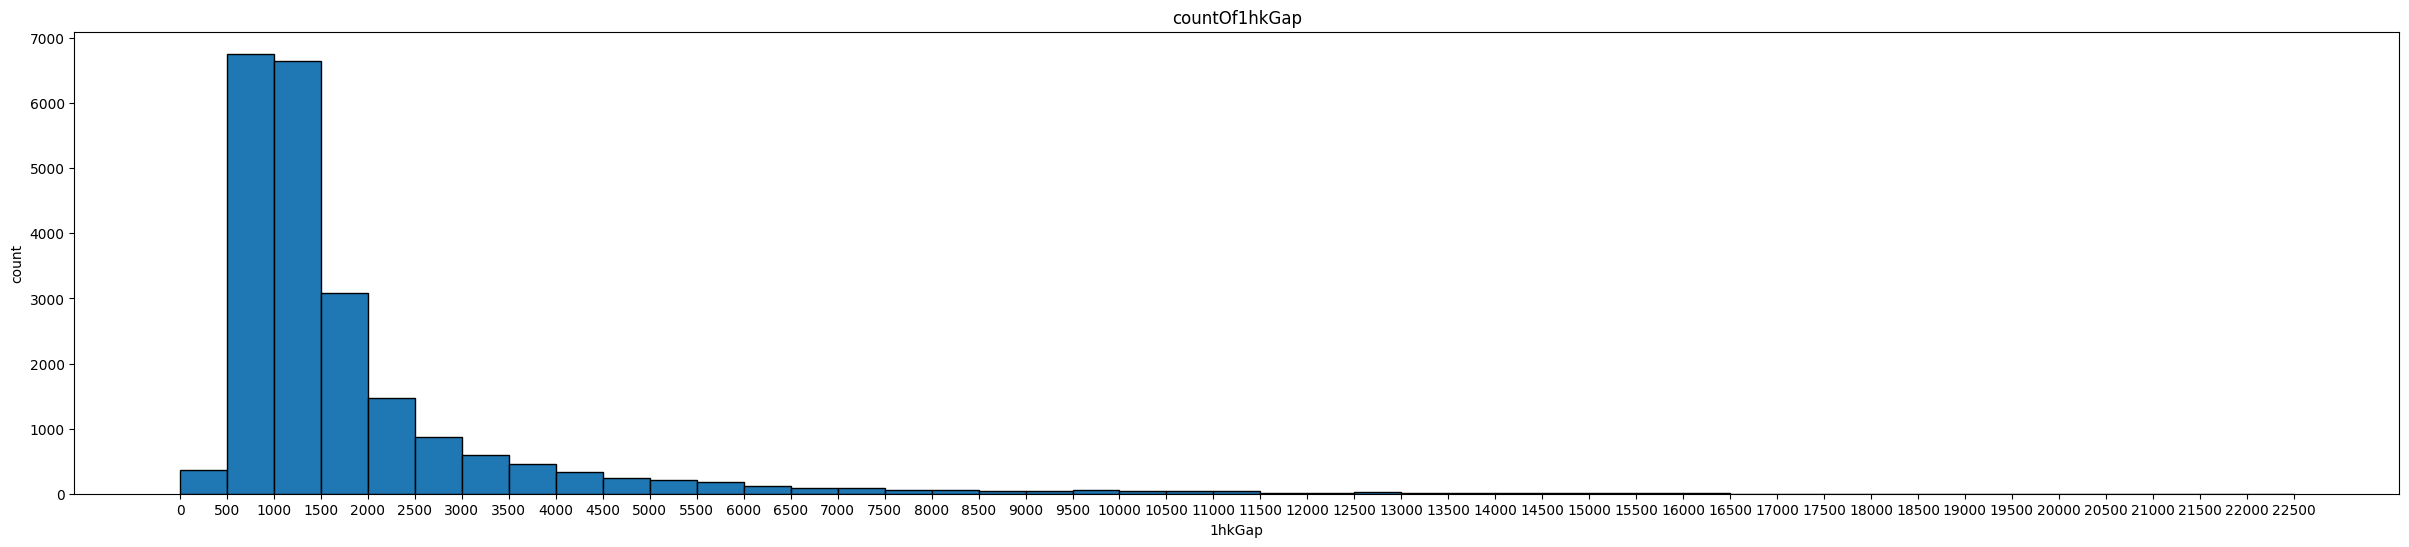

In [ ]:
tknlenLs = r1dstlds["qwnTknLen"]

drawHist(tknlenLs, binSz=500)

In [6]:
verfQDs1k = verfQDs['train'].shuffle().select(range(1000))
verfQDs1k = verfQDs1k.rename_columns({'Open-ended Verifiable Question':'question', 'Ground-True Answer':'gt_answ'})
display(verfQDs1k)
verfQDs1k.save_to_disk(os.path.join(DS_BASE, "VerifiableQAllRnd1K"))

Dataset({
    features: ['question', 'gt_answ'],
    num_rows: 1000
})

Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]